In [1]:
## Install some important non-default libraries
#!pip install networkx matplotlib
#!pip install wordcloud

In [2]:
import pandas as pd 
import seaborn as sns
chess_data = pd.read_csv("chess_games.csv")
chess_data.head(5)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [3]:
chess_moves = pd.read_csv("chess_moves_codes.csv", engine='python')
chess_moves.head(10)

,Moves,Codes
0,Polish (Sokolsky) opening,b4
1,"Polish, Tuebingen variation",b4 Nh6
2,"Polish, Outflank variation",b4 c6
3,Benko's opening,g3
4,Lasker simul special,g3 h5
5,"Benko's opening, reversed Alekhine",g3 e5 2. Nf3
6,Grob's attack,g4
7,"Grob, spike attack",g4 d5 2. Bg2 c6 3. g5
8,"Grob, Fritz gambit",g4 d5 2. Bg2 Bxg4 3. c4
9,"Grob, Romford counter-gambit",g4 d5 2. Bg2 Bxg4 3. c4 d4


In [ ]:
import re

# Create a regex pattern to match move codes
pattern = '|'.join(r'\b{}\b'.format(re.escape(x)) for x in chess_moves['Codes'])

# Function to extract move names
def extract_move_name(row):
    moves = re.findall(pattern, row['moves'])
    return ', '.join(chess_moves[chess_moves['Codes'].isin(moves)]['Moves'])

# Apply the function to create the 'Move Name' column in chess_data
chess_data['Move Name'] = chess_data.apply(extract_move_name, axis=1)
chess_data['Move Name'][0] = 'Queen Gambit'

In [5]:
chess_data_subset = chess_data[['Move Name','moves','opening_fullname','victory_status','winner']].copy()
chess_data_subset= chess_data_subset[chess_data_subset['victory_status']== 'Mate']

In [6]:
chess_data_subset.head(5)

,Move Name,moves,opening_fullname,victory_status,winner
2,"Anderssen's opening, Ware (Meadow Hay) openi...",e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,Mate,White
3,"Benko's opening, Dunst (Sleipner, Heinrichse...",d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,Mate,White
4,"Polish (Sokolsky) opening, Dunst (Sleipner, ...",e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,Mate,White
9,"Polish (Sokolsky) opening, Clemenz (Mead's, ...",e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,Scandinavian Defense: Mieses-Kotroc Variation,Mate,White
10,"Dunst (Sleipner, Heinrichsen) opening, King'...",e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,Van't Kruijs Opening,Mate,White


# Sequence of Moves

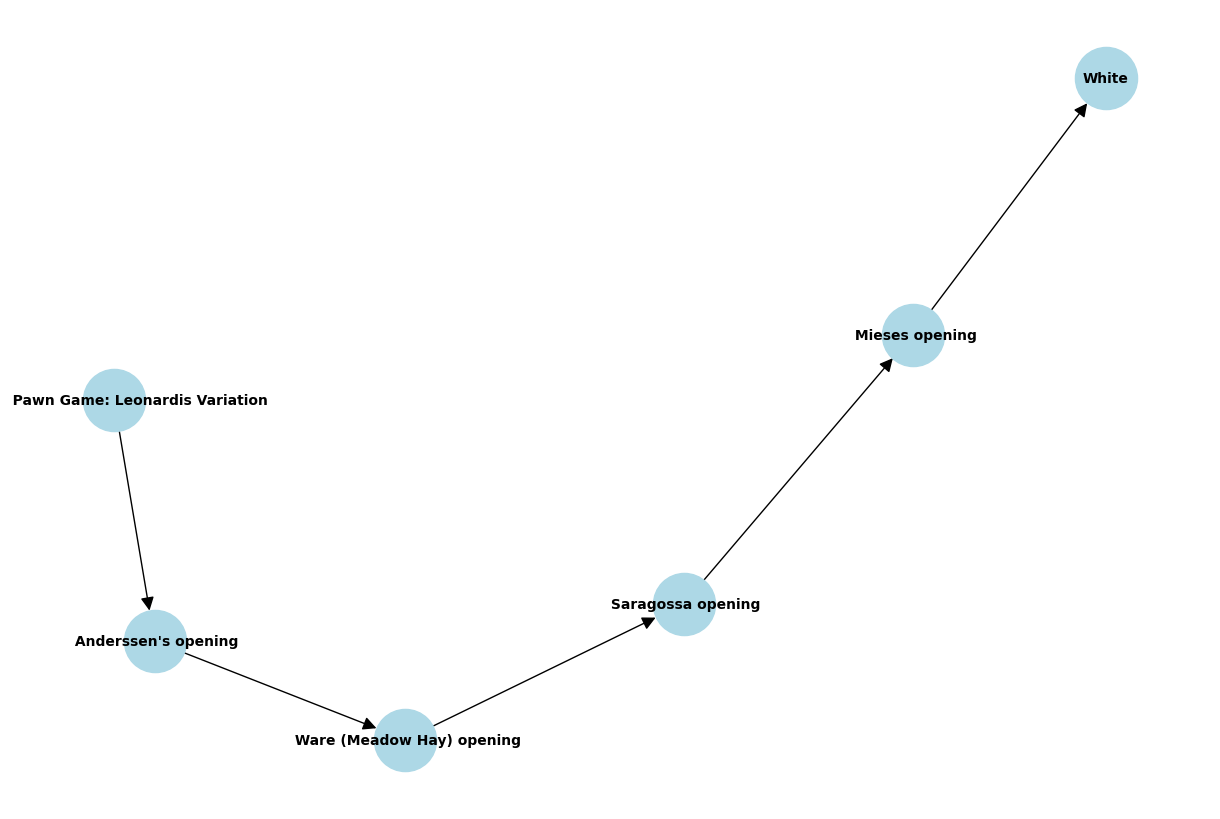

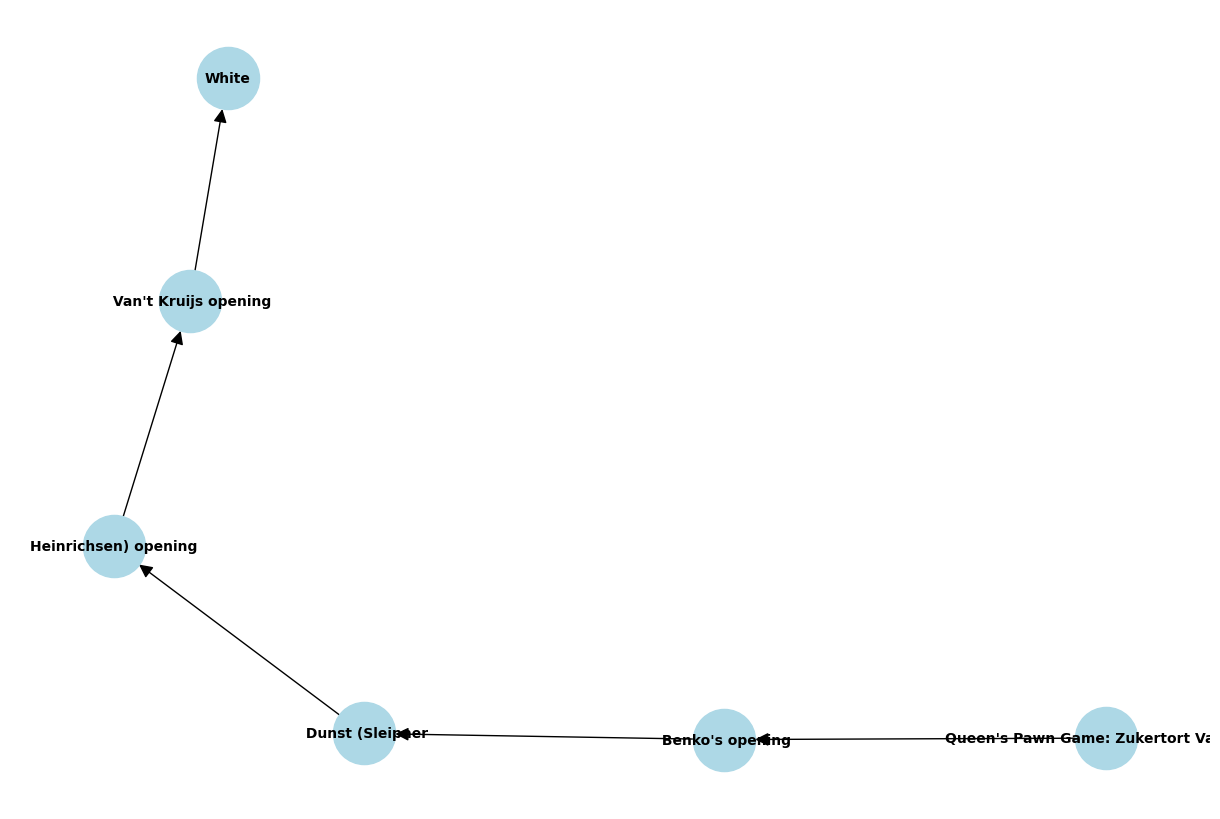

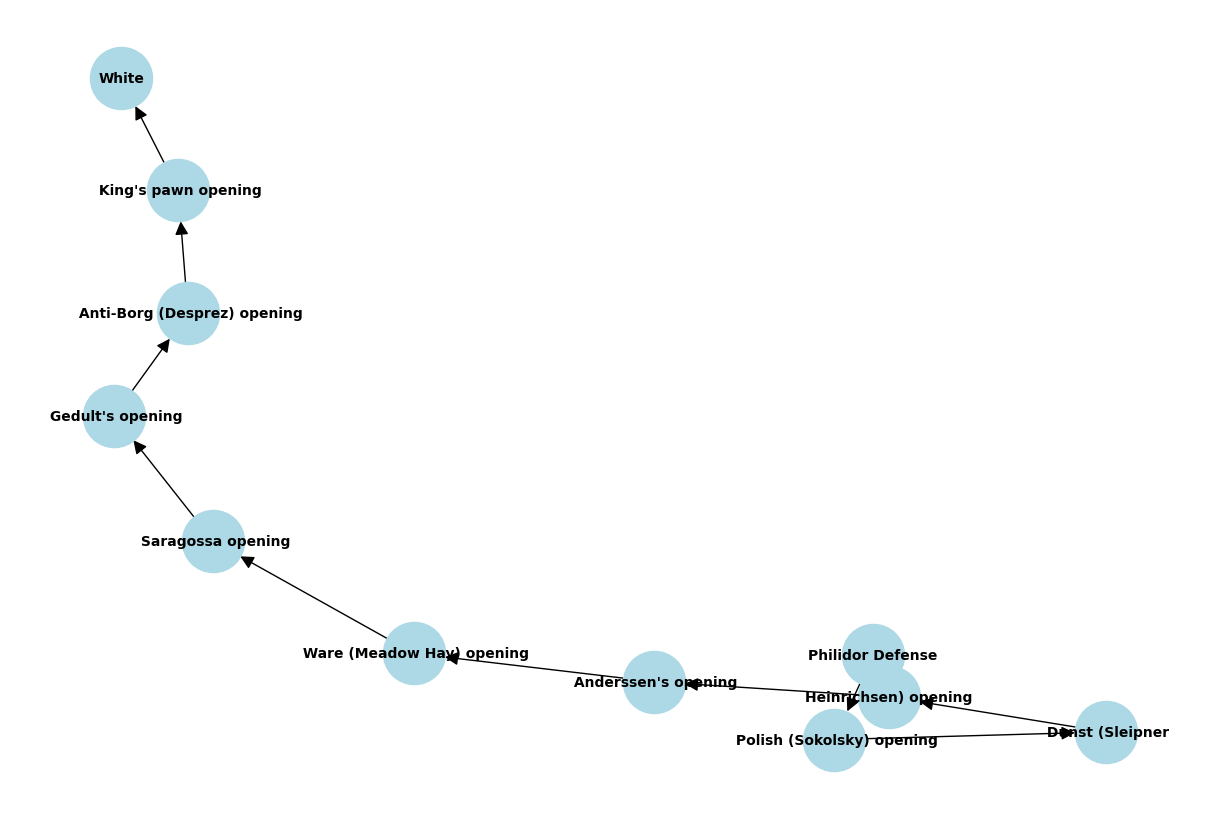

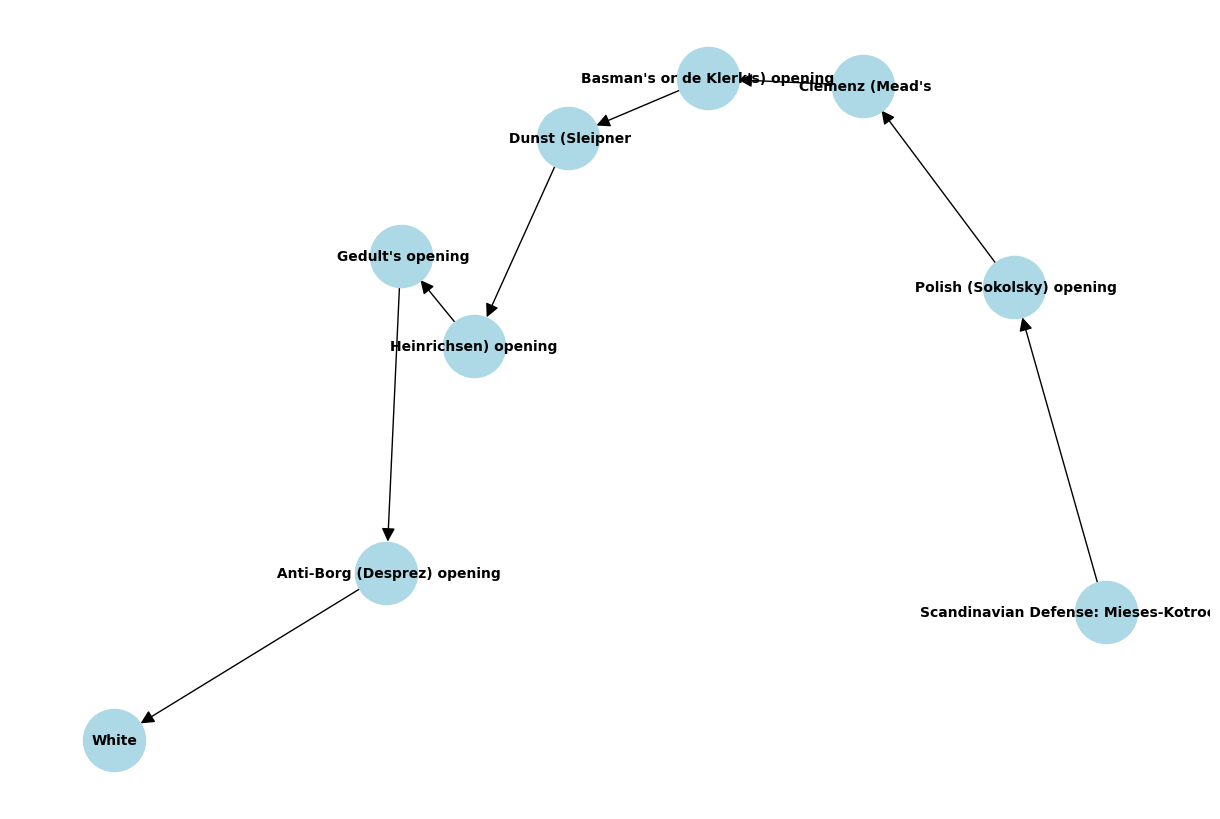

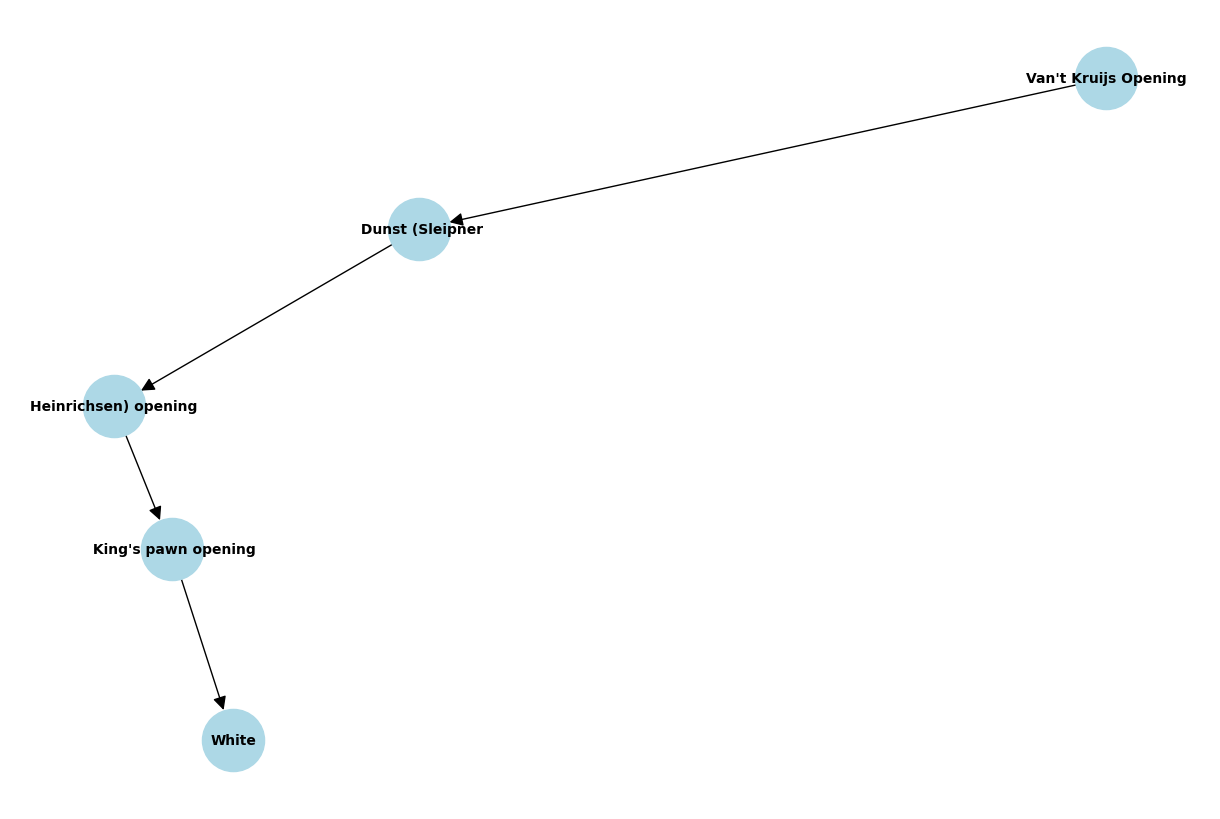

In [7]:
########################## Illustrating the Sequence of Moves for both White and Black ####################################

import networkx as nx
import matplotlib.pyplot as plt

def plot_network_for_each_record(dataframe):
    import matplotlib.pyplot as plt
    import networkx as nx

    for index, row in dataframe.iterrows():
        g = nx.DiGraph()
        opening = row['opening_fullname']
        winner = row['winner']
        moves_sequence = row['Move Name'].split(', ')

        if opening not in g:
            g.add_node(opening)

        current_node = opening
        for move in moves_sequence:
            next_node = f'{move}'
            g.add_edge(current_node, next_node)
            current_node = next_node

        g.add_edge(current_node, winner)

        plt.figure(figsize=(12, 8))
        nx.draw(g, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrowstyle='-|>', arrowsize=20)
        plt.show()

# Call the function with a subset of the dataframe to avoid generating too many graphs
plot_network_for_each_record(chess_data_subset.head(5))

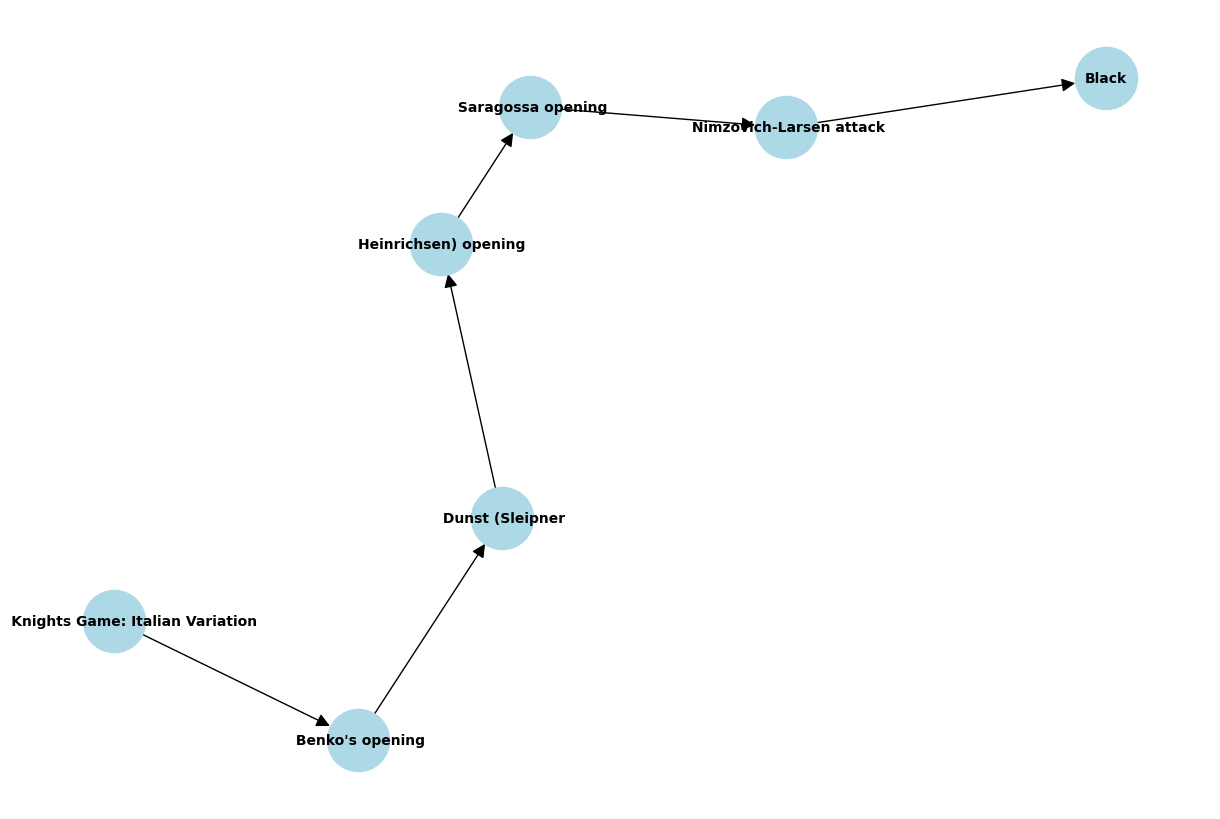

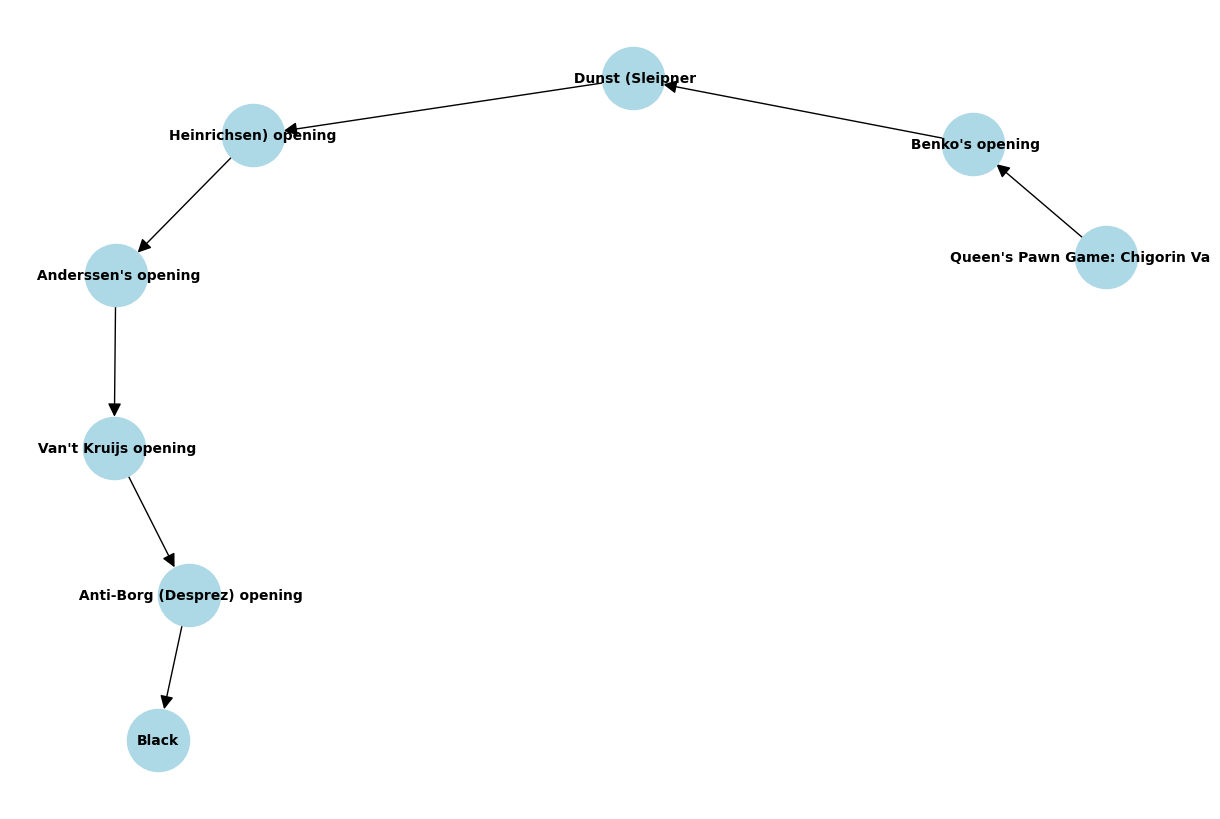

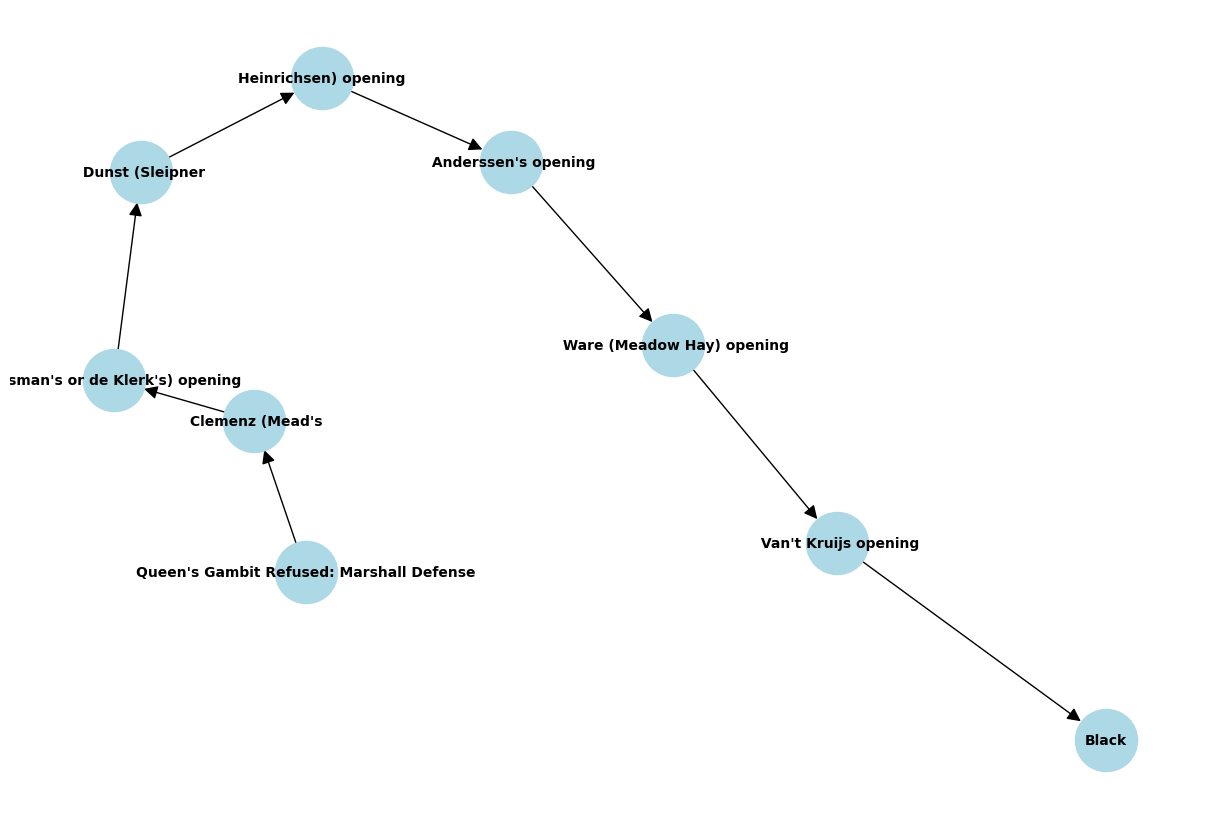

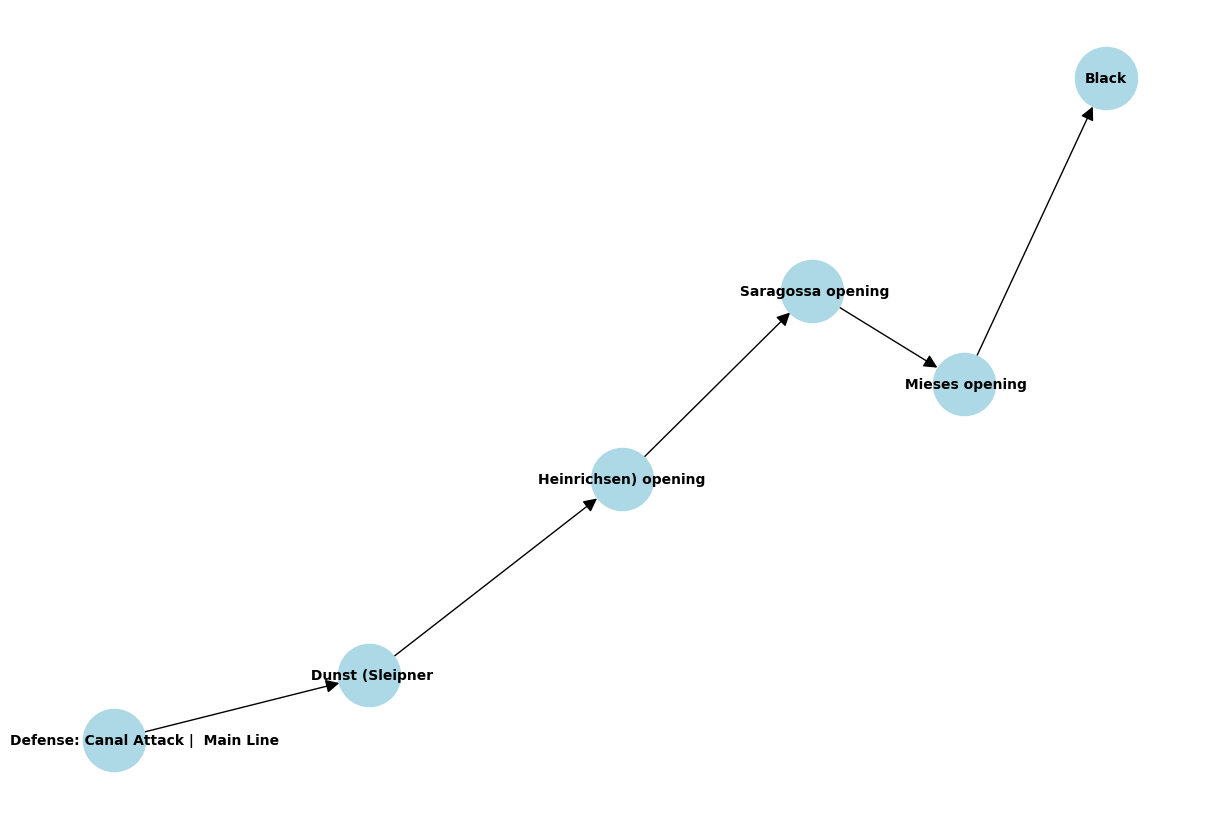

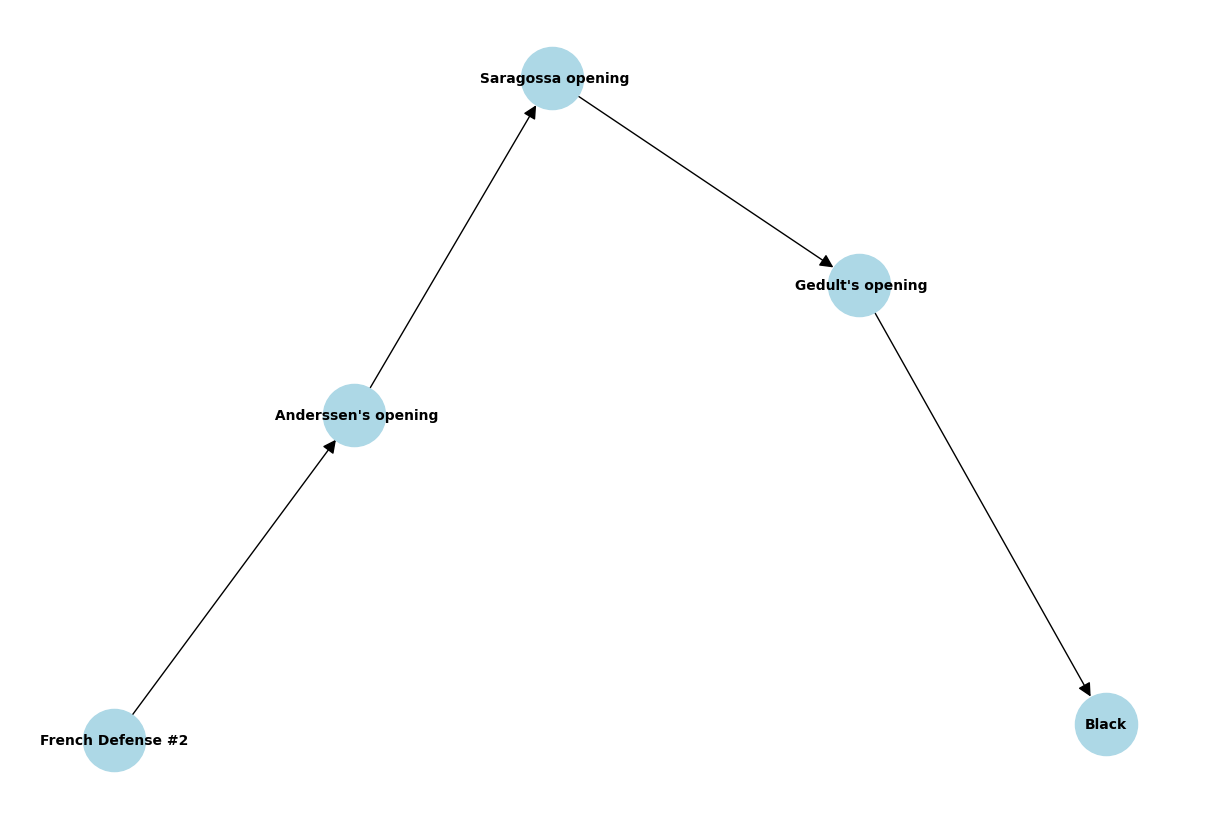

In [8]:
plot_network_for_each_record(chess_data_subset[chess_data_subset['winner']=='Black'].head(5))

# Opening Moves: Does it guarantee a check-mate?

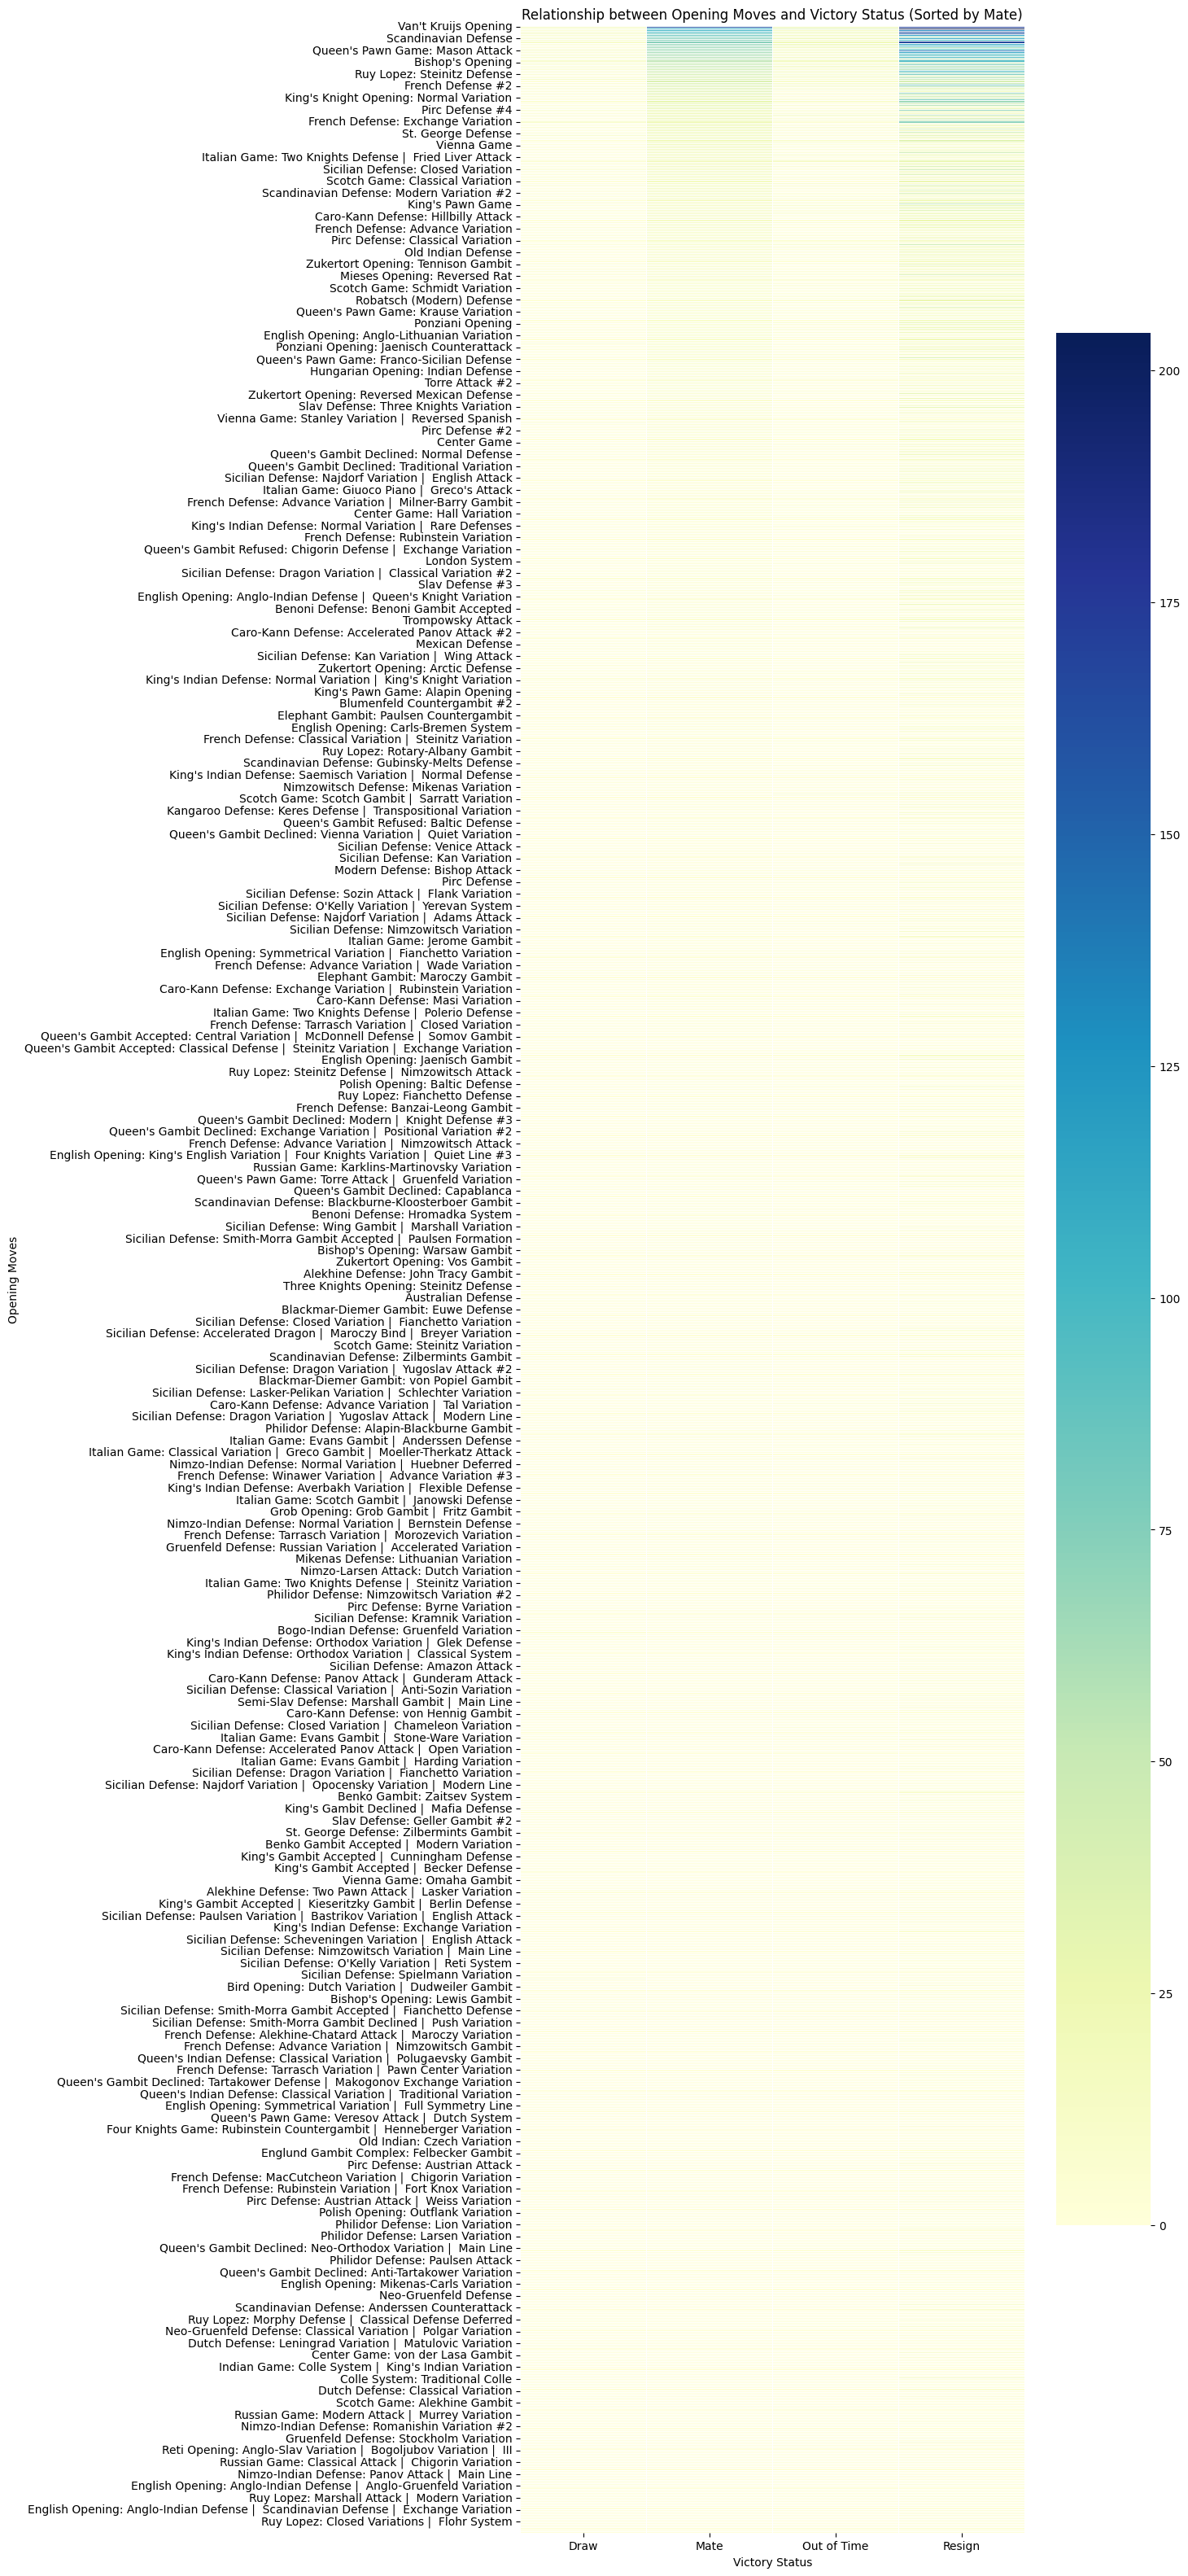

In [9]:
# Create a pivot table to explore the relationship between opening moves and victory status
pivot_table = chess_data.pivot_table(index='opening_fullname', columns='victory_status', aggfunc='size', fill_value=0)

# Sort the pivot table based on the 'Mate' column in descending order
pivot_sorted_by_mate = pivot_table.sort_values(by='Mate', ascending=False)

# Normalize the sorted pivot table by row to see the proportion of victory status for each opening
#pivot_normalized_sorted = pivot_sorted_by_mate.div(pivot_sorted_by_mate.sum(axis=1), axis=0)

# Plotting the heatmap for the sorted data
plt.figure(figsize=(10, 40))
sns.heatmap(pivot_sorted_by_mate, cmap='YlGnBu', linewidths=0.5, fmt='.0%')
plt.title('Relationship between Opening Moves and Victory Status (Sorted by Mate)')
plt.xlabel('Victory Status')
plt.ylabel('Opening Moves')
plt.show()

The heatmap above visualizes the relationship between the opening moves and the victory status in the chess games dataset. Each row represents a different chess opening, and the columns represent the different types of victory statuses (Draw, Mate, Out of Time, Resign). The colour intensity indicates the proportion of each victory status for a given opening, with darker colours indicating higher proportions. This visualization helps in identifying which openings are more likely to lead to certain outcomes.

The heatmap has been updated to visualize the relationship between opening moves and victory status, now sorted based on the descending value of 'Mate' under victory status. This allows for easier identification of which openings are more likely to lead to a checkmate.

# Most Common Moves made by Players

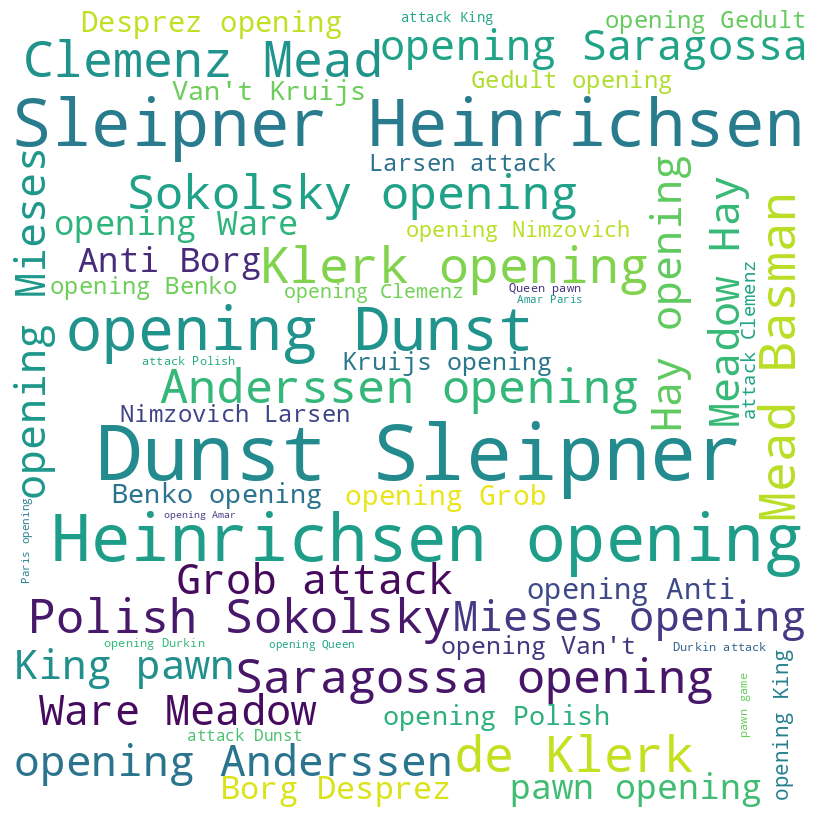

In [10]:
########################### Most Common Move Names ################################

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all move names into a single string
all_moves = ', '.join(chess_data['Move Name'])

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(all_moves)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

The word cloud visualizes the most common move names in the chess games dataset. The size of each move name in the word cloud represents its frequency, with larger sizes indicating more common moves. This visualization helps in quickly identifying the most popular moves among the chess games in the dataset.

# Sequence of moves for a better chance at check-mate.

In [11]:
# Group the data by opening_fullname and count the number of 'Mate' victory status for each opening
mate_counts = chess_data[chess_data['victory_status'] == 'Mate'].groupby('opening_fullname').size()

# Sort the openings by the number of 'Mate' in descending order
sorted_mate_counts = mate_counts.sort_values(ascending=False)

# Get the opening with the highest number of 'Mate'
max_mate_opening = sorted_mate_counts.index[0]

# Create a subset of the dataframe based on the opening move with the highest 'Mate'
subset_highest_mate_sorted = chess_data[(chess_data['opening_fullname'] == max_mate_opening) & (chess_data['victory_status'] == 'Mate')].sort_values(by='turns', ascending=False)

The subset of the dataframe based on the opening moves which has successfully resulted in the highest number of 'Mate' outcomes has been created and ordered by the descending order of the number of turns in each game. This subset contains 154 rows, each representing a chess game that started with the opening move leading to the most 'Mate' outcomes.

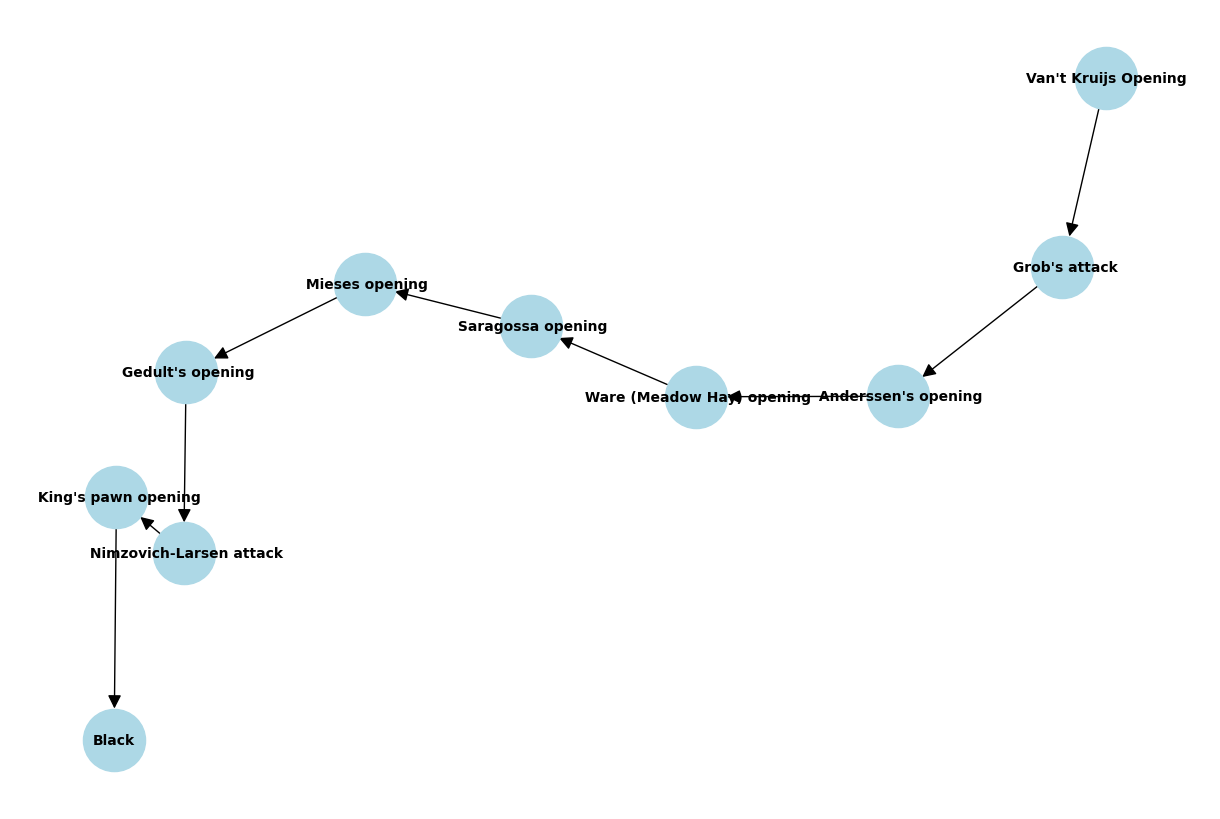

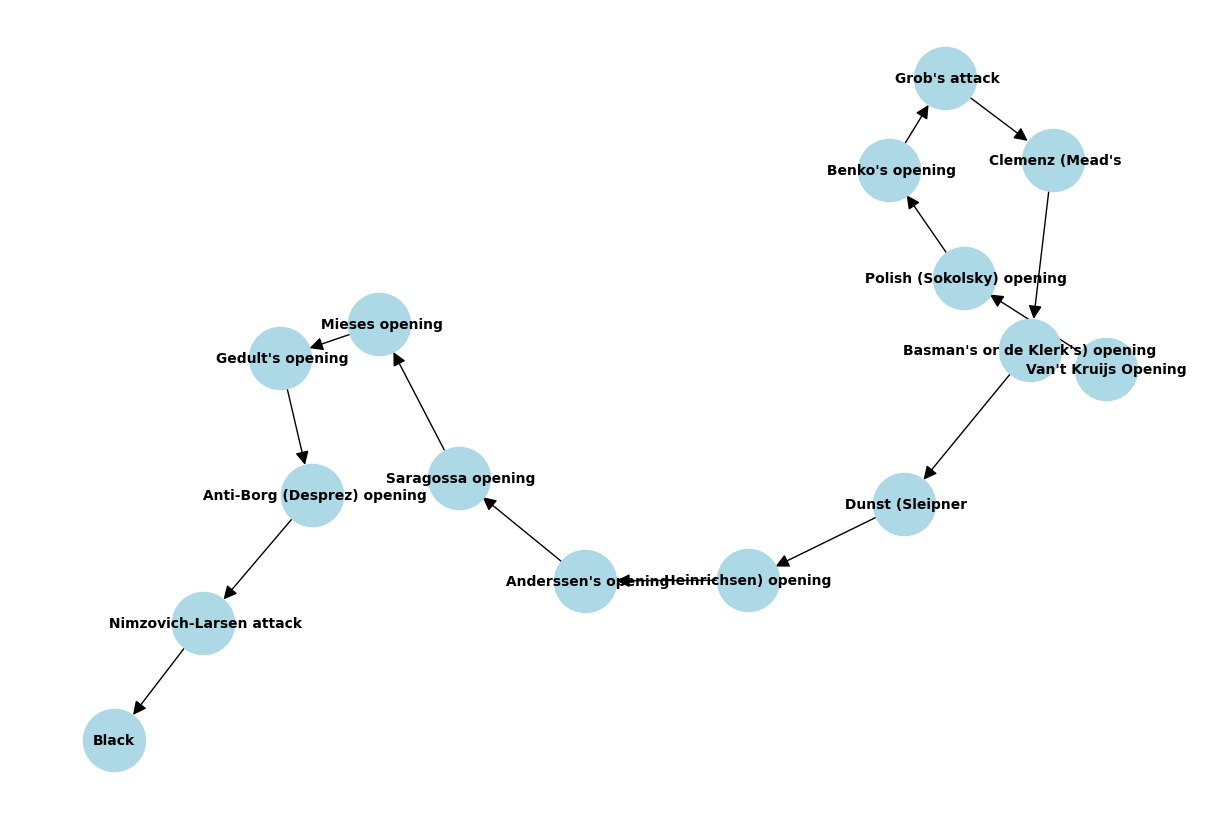

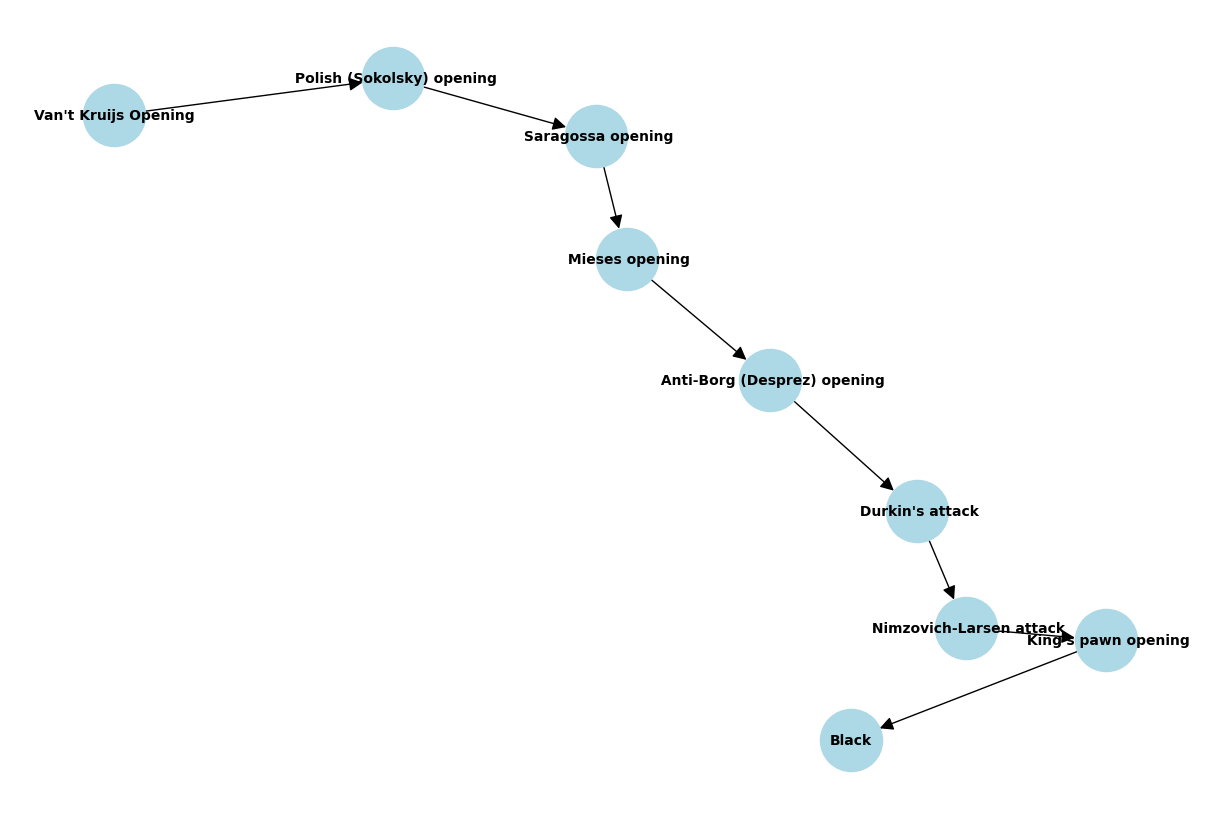

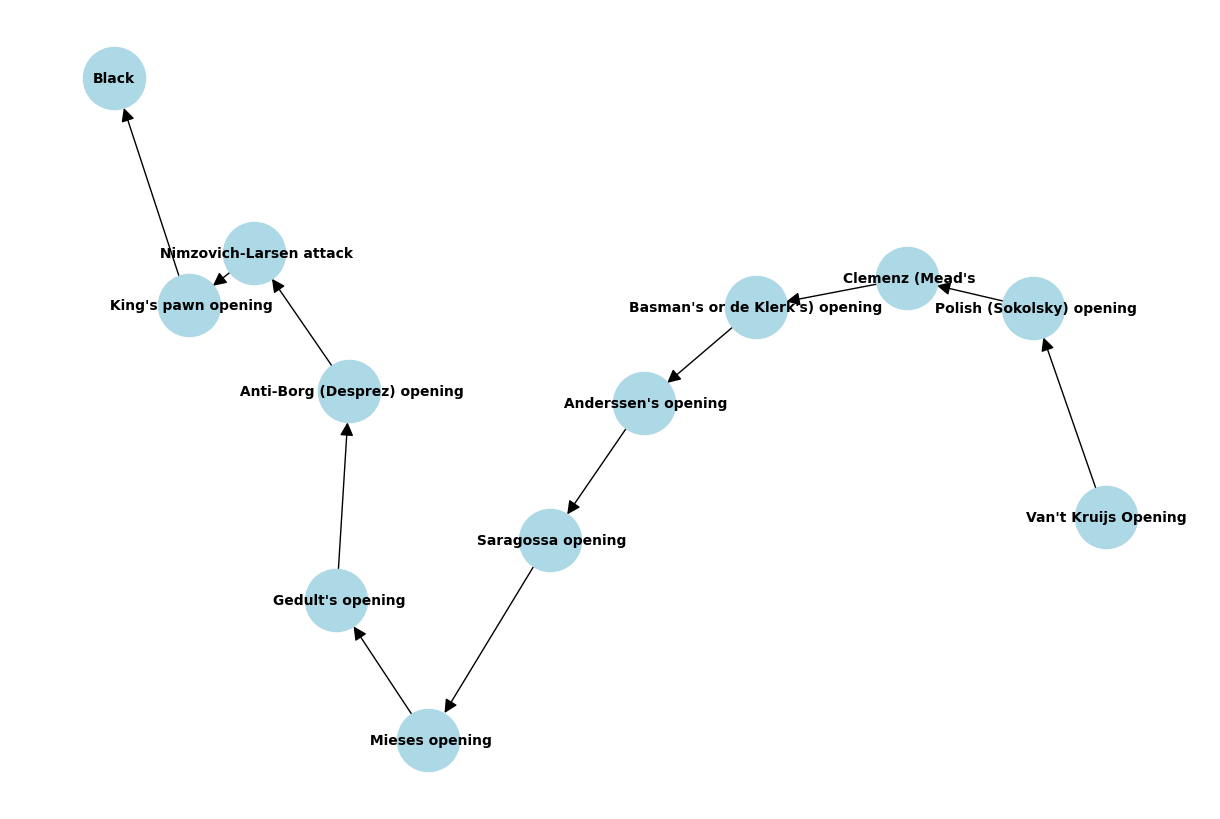

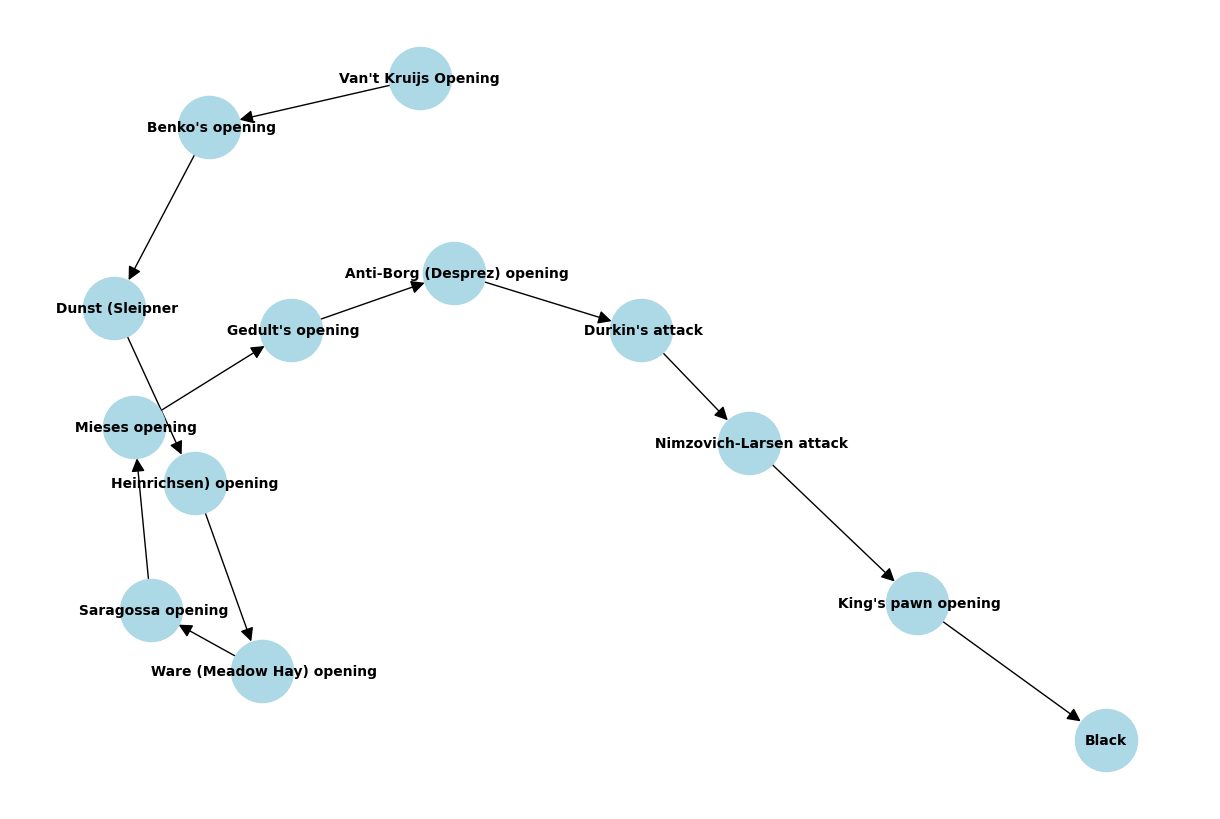

In [12]:
plot_network_for_each_record(subset_highest_mate_sorted.head(5))

The network graphs for the top 5 chess games with the opening move that resulted in the highest number of 'Mate' outcomes have been plotted. Each graph visualizes the progression of moves from the opening to the final victory status, showing the sequence and relationship between moves and the eventual winner.